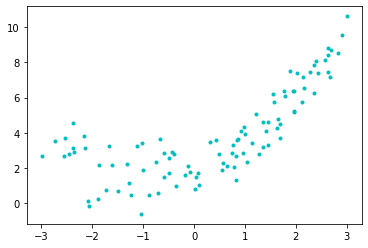

In [8]:
import matplotlib.pyplot as plt
import numpy as np

m = 100
X = 6 * np.random.rand(m, 1) - 3
X.sort()
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, 'c.')

In [9]:
## 4.4 학습곡선
'''
고차 다항 회귀 모델

얼마나 복잡한 모델을 사용할지 어떻게 결정할 수 있을까?
어떻게 모델이 데이터에 과대적합 또는 과소적합 되었는지 알 수 있을까?
2장 -> 교차 검증
다른 방법 -> 학습 곡선을 살펴보는 것
'''

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

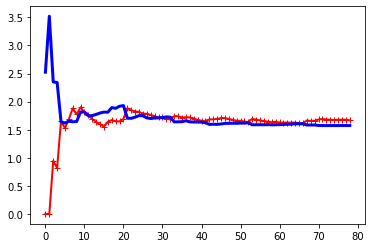

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

'''
과소적합이래
'''
pass

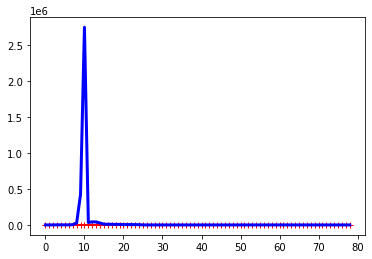

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

'''
왜 검증세트가 0으로 수렴하지??
'''
pass